## Publish and Consume OGC Services


This sample demonstrates how to create and publish simple examples of OGC WMTS, WMS, and WFS using the Python API. If you are interested in learning more about the specification to author and publish complex and more illustrative maps, refer to this <a href="https://doc.arcgis.com/en/arcgis-online/reference/ogc.htm">documentation</a>.

#### Connect to your GIS and get started:

In [27]:
from arcgis.gis import GIS
from arcgis.mapping.ogc import WMTSLayer, OGCFeatureService
from arcgis.mapping import WebMap

gis = GIS("home")

We can take a look at how many service types are supported by the `ogc` module in the Python API.

In [25]:
from arcgis.mapping import ogc
dir(ogc)

['CSVLayer',
 'GeoJSONLayer',
 'GeoRSSLayer',
 'KMLLayer',
 'OGCCollection',
 'OGCFeatureService',
 'WMSLayer',
 'WMTSLayer',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_csv',
 '_geojson',
 '_georss',
 '_kml',
 '_service',
 '_wms',
 'wmts']

#### Publishing and consuming a WMTS service

OGC Web Map Tile Service (WMTS) is a set of cached image tiles that follows the WMTS specification of OGC. You can do the following with OGC WMTS layers in ArcGIS API for Python:
 - publish to your organization along with the hosted tile layer, and share with the public.
 - add them to map widget for display.
 - access them as items in ArcGIS Online organization or enterprise.

In [7]:
wmts_url = "https://wayback.maptiles.arcgis.com/arcgis/rest/services/world_imagery/wmts"


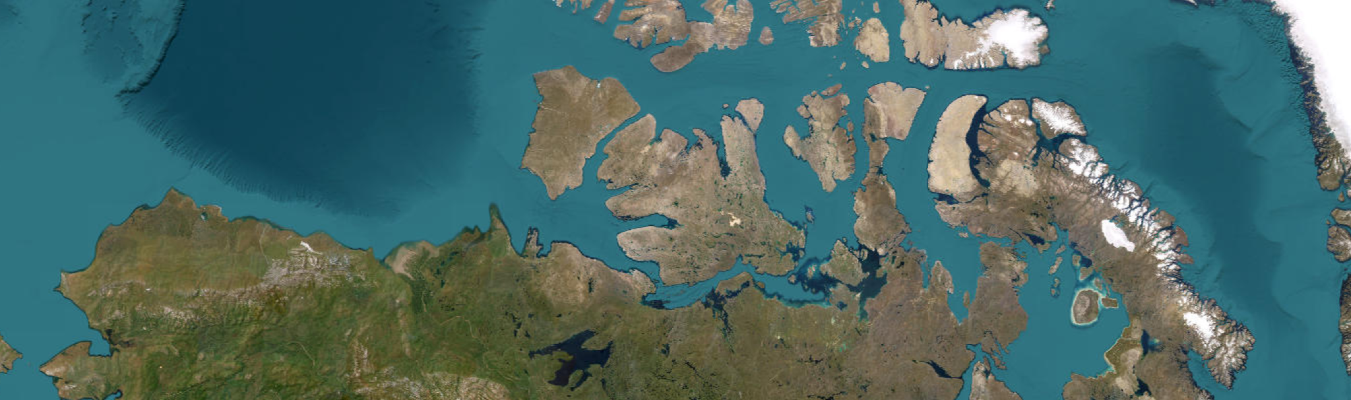

In [21]:
m = gis.map()
m.add_layer(WMTSLayer(url=wmts_url))
m

In [8]:
import json

dictItemData =  {
        'title': 'World Imagery (Wayback)', 
        'tags': ['imagery', 'wayback', 'esri_imagery', 'community basemap', 'world', 'community', 'satellite', 'orthophotos', 'baseimagery', 'general availability', 'esri_basemap', 'aerial'], 
        'accessInformation': 'Esri, Maxar, Earthstar Geographics, and the GIS User Community', 'description': "<p style='font-family: &quot;Avenir Next&quot;, Avenir, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; background-color: rgb(255, 255, 255);'>Wayback is a digital archive, providing users with access to the different versions of\xa0<a href='https://www.arcgis.com/home/item.html?id=10df2279f9684e4a9f6a7f08febac2a9' target='_blank'>World Imagery</a>\xa0created over time. Each layer in the archive represents a snapshot of the entire World Imagery map, as it existed on the date it was published. This Wayback layer is the November 28, 2022 version of World Imagery. See @Wb_Metadata_Item for detailed information about each image source in this layer.</p><p style='font-family: &quot;Avenir Next&quot;, Avenir, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; background-color: rgb(255, 255, 255);'>World Imagery provides one meter or better satellite and aerial imagery for much of the world, and lower resolution satellite imagery worldwide. As World Imagery is updated with more current imagery, new versions of the map are published. When and where updates occur, the previous imagery is replaced and is no longer visible. For many use cases, the new imagery is more desirable and typically preferred. Other times, however, the previous imagery may support use cases that the new imagery does not. In these cases, a user may need to access a previous version of World Imagery.</p><p style='font-family: &quot;Avenir Next&quot;, Avenir, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; background-color: rgb(255, 255, 255);'>Wayback currently provides access to all published versions of World Imagery, dating back to February 20, 2014. There is an ArcGIS Online item for every version which can be viewed in the\xa0<a href='https://www.arcgis.com/home/group.html?id=0f3189e1d1414edfad860b697b7d8311#overview' target='_blank'>Wayback Imagery group</a>.</p>", 
        'snippet': 'This Wayback layer is the November 28, 2022 version of the World Imagery map.', 'url': 'https://waybackdev.maptiles.arcgis.com/arcgis/rest/services/World_Imagery/WMTS/1.0.0/default028mm/MapServer/tile/7110/{level}/{row}/{col}', 
        'licenseInfo': "<img alt='' src='https://downloads.esri.com/blogs/arcgisonline/esrilogo_new.png' /> This work is licensed under the Esri Master License Agreement.<br /><div><a href='https://goto.arcgis.com/termsofuse/viewsummary' target='_blank'><b>View Summary</b></a> | <b><a href='https://goto.arcgis.com/termsofuse/viewtermsofuse' target='_blank'>View Terms of Use</a></b></div><div><br /></div><div><div><b>Export:</b> This layer is not intended to be used to export tiles for offline.</div><div><br /></div><div><b>Data Collection and Editing: </b>This layer may be used in various ArcGIS apps to support data collection and editing, with the results used internally or shared with others, as described for these\xa0<a href='https://www.arcgis.com/home/item.html?id=8e90a00a0a6845a49262e0b756f57a10' target='_blank'>use cases</a>.</div><div><br /></div></div>", 
        'extent': [[-179.99999000000003, -85.051129], [179.99999000000003, 85.051129]], 
        'text': json.dumps( WMTSLayer(wmts_url, gis=gis).__text__), 
        'type': 'WMTS', 
        'typeKeywords': ['Data', 'OGC', 'Service', 'Web Map Tile Service']
    }
item = gis.content.add(item_properties=dictItemData, upload_size=2836)
display(item)

<Item title:"World Imagery (Wayback)" type:WMTS owner:CMPeng>

In [10]:
item.delete()

True

#### Publishing and consuming a WMS service

OGC Web Map Service (WMS) is a dynamic map service that follows the WMS specification of OGC. You can do the following with OGC WMS layers in ArcGIS API for Python:
 - Add them to a web map and display.
 - Access them through ArcGIS Online or Enterprise.

In [14]:
wm = {
    "operationalLayers": [],
    "baseMap": {
        "baseMapLayers": [
            {
                "id": "defaultBasemap",
                "layerType": "ArcGISTiledMapServiceLayer",
                "url": "https://basemaps.arcgis.com/arcgis/rest/services/World_Basemap_v2/VectorTileServer",
                "visibility": True,
                "opacity": 1,
                "title": "Topographic",
            },
            {
                "id": "wms_3449",
                "url": "http://mesonet.agron.iastate.edu/cgi-bin/wms/nexrad/n0r.cgi",
                "visibility": True,
                "visibleLayers": ["nexrad-n0r"],
                "opacity": 1,
                "title": "IEM WMS Service",
                "showLegend": True,
                "type": "WMS",
                "layerType": "WMS",
                "version": "1.3.0",
                "mapUrl": "http://mesonet.agron.iastate.edu/cgi-bin/wms/nexrad/n0r.cgi",
                "layers": [
                    {"name": "nexrad-n0r", "title": "NEXRAD BASE REFLECT CURRENT"},
                    {
                        "name": "nexrad-n0r-900913",
                        "title": "NEXRAD BASE REFLECT (GOOGLE)",
                    },
                    {
                        "name": "nexrad-n0r-900913-m05m",
                        "title": "NEXRAD BASE REFLECT (GOOGLE) M5 MINS",
                    },
                    {
                        "name": "nexrad-n0r-900913-m10m",
                        "title": "NEXRAD BASE REFLECT (GOOGLE) M10 MINS",
                    },
                    {
                        "name": "nexrad-n0r-900913-m15m",
                        "title": "NEXRAD BASE REFLECT (GOOGLE) M15 MINS",
                    },
                    {
                        "name": "nexrad-n0r-900913-m20m",
                        "title": "NEXRAD BASE REFLECT (GOOGLE) M20 MINS",
                    },
                    {
                        "name": "nexrad-n0r-900913-m25m",
                        "title": "NEXRAD BASE REFLECT (GOOGLE) M25 MINS",
                    },
                    {
                        "name": "nexrad-n0r-900913-m30m",
                        "title": "NEXRAD BASE REFLECT (GOOGLE) M30 MINS",
                    },
                    {
                        "name": "nexrad-n0r-900913-m35m",
                        "title": "NEXRAD BASE REFLECT (GOOGLE) M35 MINS",
                    },
                    {
                        "name": "nexrad-n0r-900913-m40m",
                        "title": "NEXRAD BASE REFLECT (GOOGLE) M40 MINS",
                    },
                    {
                        "name": "nexrad-n0r-900913-m45m",
                        "title": "NEXRAD BASE REFLECT (GOOGLE) M45 MINS",
                    },
                    {
                        "name": "nexrad-n0r-900913-m50m",
                        "title": "NEXRAD BASE REFLECT (GOOGLE) M50 MINS",
                    },
                    {"name": "nexrad-n0r-m05m", "title": "NEXRAD BASE REFLECT M5 MINS"},
                    {
                        "name": "nexrad-n0r-m10m",
                        "title": "NEXRAD BASE REFLECT M10 MINS",
                    },
                    {
                        "name": "nexrad-n0r-m15m",
                        "title": "NEXRAD BASE REFLECT M15 MINS",
                    },
                    {
                        "name": "nexrad-n0r-m20m",
                        "title": "NEXRAD BASE REFLECT M20 MINS",
                    },
                    {
                        "name": "nexrad-n0r-m25m",
                        "title": "NEXRAD BASE REFLECT M25 MINS",
                    },
                    {
                        "name": "nexrad-n0r-m30m",
                        "title": "NEXRAD BASE REFLECT M30 MINS",
                    },
                    {
                        "name": "nexrad-n0r-m35m",
                        "title": "NEXRAD BASE REFLECT M35 MINS",
                    },
                    {
                        "name": "nexrad-n0r-m40m",
                        "title": "NEXRAD BASE REFLECT M40 MINS",
                    },
                    {
                        "name": "nexrad-n0r-m45m",
                        "title": "NEXRAD BASE REFLECT M45 MINS",
                    },
                    {
                        "name": "nexrad-n0r-m50m",
                        "title": "NEXRAD BASE REFLECT M50 MINS",
                    },
                ],
                "spatialReferences": [900913, 4326, 102100, 3857],
                "extent": [[-126, 24], [-66, 50]],
                "maxWidth": 2048,
                "maxHeight": 2048,
            },
        ],
        "title": "Topographic",
    },
    "spatialReference": {"wkid": 102100, "latestWkid": 3857},
    "authoringApp": "WebMapViewer",
    "authoringAppVersion": "4.1",
    "version": "2.1",
}

In [15]:
wms_item = gis.content.add(
                item_properties={
                    "title": "Sample WMS Map",
                    "type": "Web Map",
                    "tags": "erase, me",
                    "text": json.dumps(wm),
                }
           )
wms_item

<Item title:"Sample WMS Map" type:Web Map owner:CMPeng>


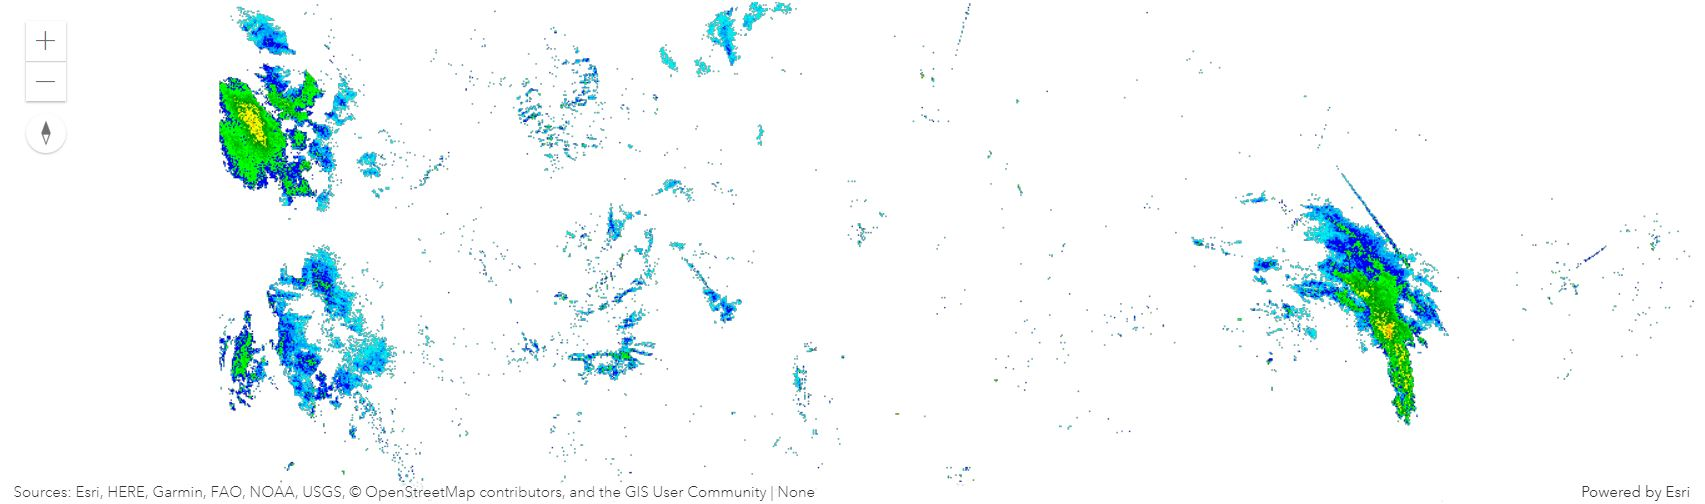

In [22]:
wm_obj = WebMap(wms_item)

# display the web map in an interactive widget
wm_obj

In [20]:
wms_item.delete()

True

#### Publishing and consuming WFS

OGC Web Feature Service (WFS) is a dynamic feature service that follows the WFS specification of OGC. You can do the following with OGC WFS layers in ArcGIS API for Python:

 - Add them to widget for map display.
 - Add them as items to ArcGIS Online or Enterprise.
 - Publish one from a hosted feature layer.

In [33]:
dictItemData =  {
        'title': 'WFS (Asbestos Mines)', 
        'tags': ['wfs'], 
        'accessInformation': 'Esri, Maxar, Earthstar Geographics, and the GIS User Community', 'description': "<p style='font-family: &quot;Avenir Next&quot;, Avenir, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; background-color: rgb(255, 255, 255);'>Wayback is a digital archive, providing users with access to the different versions of\xa0<a href='https://www.arcgis.com/home/item.html?id=10df2279f9684e4a9f6a7f08febac2a9' target='_blank'>World Imagery</a>\xa0created over time. Each layer in the archive represents a snapshot of the entire World Imagery map, as it existed on the date it was published. This Wayback layer is the November 28, 2022 version of World Imagery. See @Wb_Metadata_Item for detailed information about each image source in this layer.</p><p style='font-family: &quot;Avenir Next&quot;, Avenir, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; background-color: rgb(255, 255, 255);'>World Imagery provides one meter or better satellite and aerial imagery for much of the world, and lower resolution satellite imagery worldwide. As World Imagery is updated with more current imagery, new versions of the map are published. When and where updates occur, the previous imagery is replaced and is no longer visible. For many use cases, the new imagery is more desirable and typically preferred. Other times, however, the previous imagery may support use cases that the new imagery does not. In these cases, a user may need to access a previous version of World Imagery.</p><p style='font-family: &quot;Avenir Next&quot;, Avenir, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; background-color: rgb(255, 255, 255);'>Wayback currently provides access to all published versions of World Imagery, dating back to February 20, 2014. There is an ArcGIS Online item for every version which can be viewed in the\xa0<a href='https://www.arcgis.com/home/group.html?id=0f3189e1d1414edfad860b697b7d8311#overview' target='_blank'>Wayback Imagery group</a>.</p>", 
        'snippet': 'Asbestos mines, prospects, and occurrences in the US\nLocation, type, mineralogy, name, and status for 900 occurrences of asbestiform minerals and fibrous amphiboles. Reference: https://mrdata.usgs.gov/services/wfs/asbestos?service=WFS&request=DescribeFeatureType&version=1.1.0&typeName=asbestos', 
        'licenseInfo': "<img alt='' src='https://downloads.esri.com/blogs/arcgisonline/esrilogo_new.png' /> This work is licensed under the Esri Master License Agreement.<br /><div><a href='https://goto.arcgis.com/termsofuse/viewsummary' target='_blank'><b>View Summary</b></a> | <b><a href='https://goto.arcgis.com/termsofuse/viewtermsofuse' target='_blank'>View Terms of Use</a></b></div><div><br /></div><div><div><b>Export:</b> This layer is not intended to be used to export tiles for offline.</div><div><br /></div><div><b>Data Collection and Editing: </b>This layer may be used in various ArcGIS apps to support data collection and editing, with the results used internally or shared with others, as described for these\xa0<a href='https://www.arcgis.com/home/item.html?id=8e90a00a0a6845a49262e0b756f57a10' target='_blank'>use cases</a>.</div><div><br /></div></div>", 
        'extent': [[-179.99999000000003, -85.051129], [179.99999000000003, 85.051129]], 
        'text': json.dumps({"id":"http:\/\/mrdata.usgs.gov\/asbestos\/record\/1109","type":"Feature","geometry":{"type":"Point","coordinates":[-103.40326524264,43.985887931334]},"properties":{"state":"SD","county":"Pennington","site_name":"occurrence along Spring Creek","devel":"outcrops","latitude":"43.9859","longitude":"-103.4028","oremin":"radiating groups of needles or fibers of cummingtonite\"\" (Roberts and Rapp, 1965, p. 12)","assocmin":"garnet, hornblende, quartz, feldspar","hostrock":"amphibolite","mineral":[{"role":"asbestos","name":"cummingtonite"},{"role":"associated","name":"garnet"},{"role":"associated","name":"hornblende"},{"role":"associated","name":"quartz"},{"role":"associated","name":"feldspar"}],"reference":[{"citation":"Hamilton (1935, p. 9, 12)","source":"ofr20061211","reference":"Hamilton, R.G., 1935, Pre-Cambrian geology of the Keystone district, Black Hills, South Dakota: Iowa City, Iowa, University of Iowa, Ph.D. dissertation, 41 p."},{"citation":"Roberts and Rapp (1965, p. 12)","source":"ofr20061211","reference":"Roberts, W.L., and Rapp, George, Jr., 1965, Mineralogy of the Black Hills: Rapid City, S. Dak., South Dakota School of Mines and Technology Bulletin Number 18, 268 p."},{"citation":"Norton (1976)","onlink":"http:\/\/pubs.er.usgs.gov\/publication\/ofr76297","source":"ofr20061211","reference":"Norton, J.J., 1976, Field compilation map of the geology of the Keystone area, Black Hills, South Dakota: U.S. Geological Survey Open-File Report 76-297, 1 sheet, scale 1:20,000."},{"citation":"DeWitt and others (1988b)","onlink":"http:\/\/pubs.er.usgs.gov\/publication\/mf1978K","source":"ofr20061211","reference":"DeWitt, Ed, Buscher, David, Wilson, A.B., and Johnson, Tom, 1988b, Map showing locations of mines, prospects, and patented mining claims, and classification of mineral deposits in the Mount Rushmore 7.5-minute quadrangle, Black Hills, South Dakota: U.S. Geological Survey Miscellaneous Field Studies Map MF-1978-K, 1 sheet, scale 1:24,000."}]}}), 
        'type': 'WFS', 
        'typeKeywords': ['Data', 'OGC', 'Service', 'Web Feature Service']
    }
wfs_item = gis.content.add(item_properties=dictItemData)
display(wfs_item)

<Item title:"WFS (Asbestos Mines)" type:WFS owner:CMPeng>

In [42]:
wfs_item.get_data()

{'id': 'http:\\/\\/mrdata.usgs.gov\\/asbestos\\/record\\/1109',
 'type': 'Feature',
 'geometry': {'type': 'Point',
  'coordinates': [-103.40326524264, 43.985887931334]},
 'properties': {'state': 'SD',
  'county': 'Pennington',
  'site_name': 'occurrence along Spring Creek',
  'devel': 'outcrops',
  'latitude': '43.9859',
  'longitude': '-103.4028',
  'oremin': 'radiating groups of needles or fibers of cummingtonite"" (Roberts and Rapp, 1965, p. 12)',
  'assocmin': 'garnet, hornblende, quartz, feldspar',
  'hostrock': 'amphibolite',
  'mineral': [{'role': 'asbestos', 'name': 'cummingtonite'},
   {'role': 'associated', 'name': 'garnet'},
   {'role': 'associated', 'name': 'hornblende'},
   {'role': 'associated', 'name': 'quartz'},
   {'role': 'associated', 'name': 'feldspar'}],
  'reference': [{'citation': 'Hamilton (1935, p. 9, 12)',
    'source': 'ofr20061211',
    'reference': 'Hamilton, R.G., 1935, Pre-Cambrian geology of the Keystone district, Black Hills, South Dakota: Iowa City, Io

In [43]:
wfs_item.delete()

True